In [5]:
import cv2
import os
import numpy as np
from tensorflow.keras.models import load_model

# Load your pre-trained model
os.chdir("./")
model_path='./Chandresh.h5'
model=load_model(model_path)

In [6]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [3]:
classes[1]

'Speed limit (30km/h)'

1/1 [==============================] - 6s 6s/step
Predicted traffic sign is:  Speed limit (100km/h)


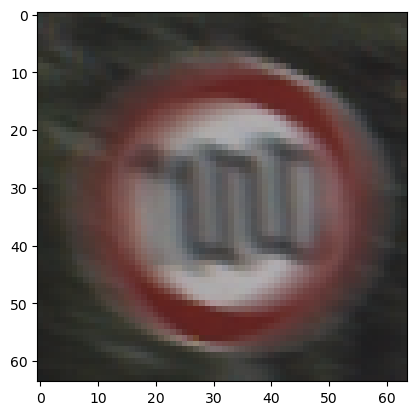

In [8]:
i = "E:\\DIAT_SEM_1_DNN_ASS\\Traffic-Classification-Project-DNN--master\\Traffic-Classification-Project-DNN--master\\Data\\00007_00000_00026.png"
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((64,64))
    data.append(np.array(image))
    X_test=np.array(data)
    # Y_pred = model.predict_classes(X_test)
    Y_pred = np.argmax(model.predict(X_test), axis=-1)
    return image,Y_pred

plot,prediction = test_on_img(i)
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

In [ ]:
model.predict()

In [9]:
import numpy as np
from PIL import Image
import tensorflow as tf
import cv2

# Load your model
model = tf.keras.models.load_model(model_path)

def get_detections_from_somewhere(frame):
    # Convert to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Define color range for detection (example: red color)
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    
    # Create a mask for red color
    mask = cv2.inRange(hsv, lower_red, upper_red)
    
    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    detections = []
    
    for contour in contours:
        if cv2.contourArea(contour) > 100:  # Minimum area threshold
            x, y, w, h = cv2.boundingRect(contour)
            detections.append({'bbox': (x, y, w, h)})
    
    return detections

In [10]:
def detect_traffic_signs(frame):
    # Assuming you have a detection method to get bounding boxes
    detections = get_detections_from_somewhere(frame)  # This needs to be defined

    bboxes = []
    for detection in detections:
        x, y, w, h = detection['bbox']  # Make sure this gets bounding box coordinates
        
        # Crop the image to the detected sign
        sign_image = frame[y:y+h, x:x+w]
        
        # Convert to PIL Image
        sign_image_pil = Image.fromarray(sign_image)
        
        # Resize image using Pillow
        sign_image_resized = sign_image_pil.resize((64, 64))  # Resize as needed
        
        # Convert to NumPy array and normalize
        sign_image_array = np.array(sign_image_resized) / 255.0
        sign_image_array = np.expand_dims(sign_image_array, axis=0)  # Add batch dimension

        # Predict the traffic sign
        predictions = model.predict(sign_image_array)
        predicted_class = np.argmax(predictions)

        # Add bounding box and prediction to the list
        bboxes.append({
            'bbox': (x, y, w, h),
            'predicted_class': predicted_class
        })

    return bboxes


In [18]:
# Example usage in a video processing loop
cap = cv2.VideoCapture('sun17.mp4')

while cap.isOpened():
    ret, frame = cap.read()
#     frame = cv2.resize(frame, (1000, 1000))
    if not ret:
        break

    detections = detect_traffic_signs(frame)

    for detection in detections:
        print(detection)
        x, y, w, h = detection['bbox']
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, str(classes[int(str(detection['predicted_class']))]), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        
    cv2.imshow('Traffic Sign Detection', frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 19ms/step
{'bbox': (178, 800, 12, 27), 'predicted_class': 34}
1/1 [==============================] - 0s 18ms/step
{'bbox': (180, 792, 16, 34), 'predicted_class': 40}
1/1 [==============================] - 0s 18ms/step
{'bbox': (187, 792, 13, 30), 'predicted_class': 33}
1/1 [==============================] - 0s 18ms/step
{'bbox': (190, 792, 12, 30), 'predicted_class': 33}
1/1 [==============================] - 0s 18ms/step
{'bbox': (192, 792, 12, 30), 'predicted_class': 33}
1/1 [==============================] - 0s 18ms/step
{'bbox': (194, 792, 12, 30), 'predicted_class': 33}
1/1 [==============================] - 0s 18ms/step
{'bbox': (196, 794, 12, 28), 'predicted_class': 33}
1/1 [==============================] - 0s 19ms/step
{'bbox': (197, 794, 13, 30), 'predicted_class': 33}
1/1 [==============================] - 0s 19ms/step
{'bbox': (198, 794, 13, 30), 'predicted_class': 33}
1/1 [==============================] - 0s 25ms/step
{'bbox': (19

1/1 [==============================] - 0s 19ms/step
{'bbox': (457, 847, 13, 21), 'predicted_class': 35}
1/1 [==============================] - 0s 19ms/step
{'bbox': (439, 850, 13, 20), 'predicted_class': 35}
1/1 [==============================] - 0s 17ms/step
{'bbox': (416, 850, 18, 22), 'predicted_class': 35}
1/1 [==============================] - 0s 18ms/step
{'bbox': (375, 855, 19, 21), 'predicted_class': 35}
1/1 [==============================] - 0s 17ms/step
{'bbox': (352, 855, 20, 24), 'predicted_class': 35}
1/1 [==============================] - 0s 18ms/step
{'bbox': (0, 256, 24, 14), 'predicted_class': 35}
1/1 [==============================] - 0s 19ms/step
{'bbox': (0, 258, 30, 12), 'predicted_class': 35}
1/1 [==============================] - 0s 18ms/step
{'bbox': (0, 260, 38, 12), 'predicted_class': 35}
1/1 [==============================] - 0s 18ms/step
{'bbox': (0, 260, 48, 14), 'predicted_class': 35}
1/1 [==============================] - 0s 18ms/step
{'bbox': (4, 260, 52

1/1 [==============================] - 0s 19ms/step
{'bbox': (536, 846, 26, 24), 'predicted_class': 35}
{'bbox': (444, 647, 16, 48), 'predicted_class': 35}
{'bbox': (608, 564, 38, 11), 'predicted_class': 18}
{'bbox': (449, 530, 13, 42), 'predicted_class': 35}
1/1 [==============================] - 0s 18ms/step
{'bbox': (558, 842, 26, 28), 'predicted_class': 35}
{'bbox': (468, 643, 15, 48), 'predicted_class': 35}
{'bbox': (632, 560, 38, 10), 'predicted_class': 34}
{'bbox': (474, 528, 14, 38), 'predicted_class': 35}
1/1 [==============================] - 0s 17ms/step
{'bbox': (586, 838, 26, 30), 'predicted_class': 35}
{'bbox': (494, 641, 16, 49), 'predicted_class': 35}
{'bbox': (0, 608, 6, 32), 'predicted_class': 34}
{'bbox': (500, 526, 12, 37), 'predicted_class': 35}
1/1 [==============================] - 0s 18ms/step
{'bbox': (586, 848, 23, 21), 'predicted_class': 35}
{'bbox': (612, 837, 15, 29), 'predicted_class': 35}
{'bbox': (522, 640, 15, 47), 'predicted_class': 35}
{'bbox': (0, 58

1/1 [==============================] - 0s 19ms/step
{'bbox': (856, 814, 18, 26), 'predicted_class': 35}
{'bbox': (767, 748, 9, 34), 'predicted_class': 35}
{'bbox': (156, 642, 14, 26), 'predicted_class': 6}
{'bbox': (770, 620, 8, 46), 'predicted_class': 34}
{'bbox': (166, 586, 21, 30), 'predicted_class': 40}
{'bbox': (189, 578, 15, 24), 'predicted_class': 34}
{'bbox': (238, 556, 21, 30), 'predicted_class': 6}
{'bbox': (255, 554, 52, 53), 'predicted_class': 34}
{'bbox': (768, 506, 11, 42), 'predicted_class': 40}
1/1 [==============================] - 0s 20ms/step
{'bbox': (847, 824, 30, 23), 'predicted_class': 35}
{'bbox': (877, 813, 20, 31), 'predicted_class': 35}
{'bbox': (789, 742, 9, 40), 'predicted_class': 35}
{'bbox': (182, 640, 16, 27), 'predicted_class': 40}
{'bbox': (787, 618, 13, 46), 'predicted_class': 35}
{'bbox': (192, 584, 20, 30), 'predicted_class': 40}
{'bbox': (214, 576, 14, 24), 'predicted_class': 34}
{'bbox': (262, 552, 70, 54), 'predicted_class': 12}
{'bbox': (790, 50

1/1 [==============================] - 0s 18ms/step
{'bbox': (1051, 828, 25, 16), 'predicted_class': 35}
{'bbox': (1016, 812, 30, 34), 'predicted_class': 35}
{'bbox': (995, 810, 24, 24), 'predicted_class': 35}
{'bbox': (952, 752, 8, 27), 'predicted_class': 35}
{'bbox': (951, 614, 10, 48), 'predicted_class': 34}
{'bbox': (368, 573, 18, 29), 'predicted_class': 40}
{'bbox': (120, 551, 10, 20), 'predicted_class': 34}
{'bbox': (100, 548, 12, 22), 'predicted_class': 34}
{'bbox': (438, 538, 66, 59), 'predicted_class': 12}
1/1 [==============================] - 0s 17ms/step
{'bbox': (1067, 826, 27, 18), 'predicted_class': 35}
{'bbox': (1034, 811, 30, 35), 'predicted_class': 35}
{'bbox': (1013, 810, 25, 24), 'predicted_class': 35}
{'bbox': (970, 752, 8, 27), 'predicted_class': 35}
{'bbox': (1128, 660, 18, 9), 'predicted_class': 35}
{'bbox': (969, 612, 10, 50), 'predicted_class': 34}
{'bbox': (386, 572, 18, 28), 'predicted_class': 35}
{'bbox': (142, 550, 10, 20), 'predicted_class': 34}
{'bbox': 

1/1 [==============================] - 0s 18ms/step
{'bbox': (1210, 824, 30, 18), 'predicted_class': 35}
{'bbox': (1154, 806, 70, 37), 'predicted_class': 40}
{'bbox': (1109, 734, 10, 36), 'predicted_class': 35}
{'bbox': (1310, 646, 32, 10), 'predicted_class': 35}
{'bbox': (1111, 606, 7, 45), 'predicted_class': 35}
{'bbox': (525, 554, 18, 28), 'predicted_class': 36}
{'bbox': (302, 548, 8, 18), 'predicted_class': 35}
{'bbox': (281, 545, 12, 20), 'predicted_class': 35}
{'bbox': (596, 514, 66, 60), 'predicted_class': 12}
{'bbox': (1110, 378, 8, 25), 'predicted_class': 35}
1/1 [==============================] - 0s 18ms/step
{'bbox': (1227, 826, 31, 16), 'predicted_class': 35}
{'bbox': (1282, 822, 42, 26), 'predicted_class': 35}
{'bbox': (1172, 805, 75, 37), 'predicted_class': 34}
{'bbox': (1125, 734, 10, 36), 'predicted_class': 35}
{'bbox': (1292, 646, 68, 12), 'predicted_class': 35}
{'bbox': (1124, 604, 10, 48), 'predicted_class': 40}
{'bbox': (548, 551, 11, 23), 'predicted_class': 35}
{'b

1/1 [==============================] - 0s 18ms/step
{'bbox': (1422, 816, 20, 24), 'predicted_class': 35}
{'bbox': (1389, 816, 32, 14), 'predicted_class': 35}
{'bbox': (1455, 801, 17, 33), 'predicted_class': 34}
{'bbox': (1328, 793, 61, 37), 'predicted_class': 35}
{'bbox': (1251, 720, 15, 42), 'predicted_class': 35}
{'bbox': (1432, 628, 52, 15), 'predicted_class': 35}
{'bbox': (628, 622, 11, 30), 'predicted_class': 34}
{'bbox': (1255, 588, 7, 46), 'predicted_class': 35}
{'bbox': (650, 586, 16, 44), 'predicted_class': 34}
{'bbox': (430, 533, 10, 19), 'predicted_class': 35}
{'bbox': (664, 523, 15, 35), 'predicted_class': 40}
{'bbox': (744, 474, 62, 64), 'predicted_class': 34}
1/1 [==============================] - 0s 18ms/step
{'bbox': (1410, 814, 28, 14), 'predicted_class': 35}
{'bbox': (1344, 792, 56, 20), 'predicted_class': 34}
{'bbox': (1266, 718, 14, 42), 'predicted_class': 35}
{'bbox': (1448, 630, 24, 11), 'predicted_class': 35}
{'bbox': (644, 620, 10, 31), 'predicted_class': 34}
{'

1/1 [==============================] - 0s 20ms/step
{'bbox': (1590, 818, 20, 25), 'predicted_class': 34}
{'bbox': (987, 755, 21, 11), 'predicted_class': 34}
{'bbox': (1376, 710, 18, 48), 'predicted_class': 35}
{'bbox': (740, 601, 17, 44), 'predicted_class': 33}
{'bbox': (765, 590, 7, 30), 'predicted_class': 34}
{'bbox': (756, 584, 8, 50), 'predicted_class': 35}
{'bbox': (1382, 576, 6, 49), 'predicted_class': 35}
{'bbox': (764, 566, 16, 26), 'predicted_class': 35}
{'bbox': (798, 492, 12, 24), 'predicted_class': 34}
{'bbox': (846, 448, 82, 80), 'predicted_class': 12}
1/1 [==============================] - 0s 17ms/step
{'bbox': (1608, 818, 20, 26), 'predicted_class': 34}
{'bbox': (1392, 710, 18, 45), 'predicted_class': 35}
{'bbox': (754, 606, 16, 43), 'predicted_class': 40}
{'bbox': (778, 590, 8, 30), 'predicted_class': 34}
{'bbox': (770, 586, 6, 47), 'predicted_class': 34}
{'bbox': (1396, 576, 6, 49), 'predicted_class': 35}
{'bbox': (776, 566, 18, 26), 'predicted_class': 35}
{'bbox': (81

1/1 [==============================] - 0s 18ms/step
{'bbox': (1146, 747, 24, 13), 'predicted_class': 35}
{'bbox': (1540, 702, 18, 53), 'predicted_class': 34}
{'bbox': (881, 588, 18, 39), 'predicted_class': 35}
{'bbox': (908, 568, 8, 28), 'predicted_class': 35}
{'bbox': (898, 568, 9, 40), 'predicted_class': 34}
{'bbox': (906, 538, 16, 26), 'predicted_class': 34}
{'bbox': (926, 472, 10, 28), 'predicted_class': 34}
{'bbox': (998, 398, 95, 98), 'predicted_class': 12}
1/1 [==============================] - 0s 17ms/step
{'bbox': (1154, 746, 34, 14), 'predicted_class': 35}
{'bbox': (1556, 702, 18, 54), 'predicted_class': 35}
{'bbox': (896, 584, 18, 40), 'predicted_class': 35}
{'bbox': (912, 554, 10, 51), 'predicted_class': 35}
{'bbox': (922, 534, 16, 60), 'predicted_class': 34}
{'bbox': (962, 528, 20, 22), 'predicted_class': 34}
{'bbox': (941, 470, 11, 28), 'predicted_class': 38}
{'bbox': (958, 450, 16, 27), 'predicted_class': 34}
{'bbox': (1014, 392, 97, 100), 'predicted_class': 12}
1/1 [===

1/1 [==============================] - 0s 18ms/step
{'bbox': (1302, 748, 30, 14), 'predicted_class': 35}
{'bbox': (1702, 700, 12, 32), 'predicted_class': 35}
{'bbox': (1012, 584, 21, 46), 'predicted_class': 25}
{'bbox': (1694, 548, 9, 56), 'predicted_class': 35}
{'bbox': (1030, 528, 12, 68), 'predicted_class': 35}
{'bbox': (1040, 512, 17, 67), 'predicted_class': 6}
{'bbox': (1084, 504, 22, 24), 'predicted_class': 34}
{'bbox': (1052, 442, 22, 38), 'predicted_class': 40}
{'bbox': (1080, 424, 16, 23), 'predicted_class': 35}
{'bbox': (1150, 346, 110, 110), 'predicted_class': 12}
1/1 [==============================] - 0s 19ms/step
{'bbox': (1320, 752, 18, 10), 'predicted_class': 35}
{'bbox': (1716, 700, 16, 32), 'predicted_class': 35}
{'bbox': (1026, 584, 22, 44), 'predicted_class': 25}
{'bbox': (1712, 548, 8, 56), 'predicted_class': 35}
{'bbox': (1044, 526, 14, 70), 'predicted_class': 33}
{'bbox': (1055, 510, 17, 68), 'predicted_class': 34}
{'bbox': (1102, 502, 22, 24), 'predicted_class': 

1/1 [==============================] - 0s 17ms/step
{'bbox': (1392, 764, 30, 16), 'predicted_class': 34}
{'bbox': (1820, 709, 20, 57), 'predicted_class': 35}
{'bbox': (1112, 577, 28, 39), 'predicted_class': 35}
{'bbox': (1812, 554, 8, 56), 'predicted_class': 35}
{'bbox': (1134, 526, 15, 74), 'predicted_class': 35}
{'bbox': (1146, 506, 15, 74), 'predicted_class': 35}
{'bbox': (1200, 500, 20, 22), 'predicted_class': 34}
{'bbox': (1158, 451, 11, 26), 'predicted_class': 35}
{'bbox': (1150, 437, 17, 23), 'predicted_class': 36}
{'bbox': (1189, 410, 21, 30), 'predicted_class': 35}
{'bbox': (1278, 309, 124, 126), 'predicted_class': 12}
1/1 [==============================] - 0s 18ms/step
{'bbox': (1836, 706, 20, 56), 'predicted_class': 35}
{'bbox': (1126, 576, 28, 38), 'predicted_class': 40}
{'bbox': (1826, 550, 10, 59), 'predicted_class': 35}
{'bbox': (1148, 524, 16, 76), 'predicted_class': 35}
{'bbox': (1160, 504, 15, 74), 'predicted_class': 35}
{'bbox': (1214, 498, 22, 20), 'predicted_class'

1/1 [==============================] - 0s 17ms/step
{'bbox': (1238, 596, 34, 67), 'predicted_class': 34}
{'bbox': (1263, 530, 20, 88), 'predicted_class': 33}
{'bbox': (1332, 518, 16, 12), 'predicted_class': 34}
{'bbox': (1277, 510, 19, 85), 'predicted_class': 35}
{'bbox': (1304, 490, 14, 16), 'predicted_class': 35}
{'bbox': (1277, 432, 27, 60), 'predicted_class': 16}
{'bbox': (1306, 404, 21, 56), 'predicted_class': 6}
{'bbox': (1330, 384, 28, 60), 'predicted_class': 40}
{'bbox': (1470, 306, 12, 34), 'predicted_class': 25}
{'bbox': (1452, 268, 150, 148), 'predicted_class': 12}
1/1 [==============================] - 0s 19ms/step
{'bbox': (1576, 814, 26, 10), 'predicted_class': 35}
{'bbox': (1256, 558, 30, 110), 'predicted_class': 40}
{'bbox': (1328, 542, 14, 20), 'predicted_class': 40}
{'bbox': (1278, 530, 20, 90), 'predicted_class': 35}
{'bbox': (1292, 512, 20, 84), 'predicted_class': 35}
{'bbox': (1320, 490, 12, 16), 'predicted_class': 35}
{'bbox': (1372, 466, 18, 16), 'predicted_class

1/1 [==============================] - 0s 19ms/step
{'bbox': (1656, 836, 34, 10), 'predicted_class': 34}
{'bbox': (1320, 564, 36, 114), 'predicted_class': 40}
{'bbox': (1366, 548, 14, 27), 'predicted_class': 34}
{'bbox': (1402, 536, 16, 29), 'predicted_class': 34}
{'bbox': (1345, 532, 25, 98), 'predicted_class': 35}
{'bbox': (1392, 492, 16, 18), 'predicted_class': 35}
{'bbox': (1454, 458, 24, 50), 'predicted_class': 35}
{'bbox': (1348, 426, 44, 62), 'predicted_class': 34}
{'bbox': (1426, 421, 42, 47), 'predicted_class': 6}
{'bbox': (1392, 394, 22, 62), 'predicted_class': 16}
{'bbox': (1418, 367, 36, 71), 'predicted_class': 35}
{'bbox': (1584, 227, 164, 167), 'predicted_class': 12}
1/1 [==============================] - 0s 19ms/step
{'bbox': (1680, 836, 30, 14), 'predicted_class': 34}
{'bbox': (1388, 579, 12, 27), 'predicted_class': 35}
{'bbox': (1334, 564, 38, 116), 'predicted_class': 40}
{'bbox': (1382, 550, 12, 24), 'predicted_class': 34}
{'bbox': (1416, 534, 19, 32), 'predicted_clas

1/1 [==============================] - 0s 18ms/step
{'bbox': (1428, 604, 46, 82), 'predicted_class': 40}
{'bbox': (1440, 560, 14, 38), 'predicted_class': 34}
{'bbox': (1456, 526, 33, 112), 'predicted_class': 35}
{'bbox': (1516, 488, 32, 74), 'predicted_class': 34}
{'bbox': (1452, 448, 22, 46), 'predicted_class': 40}
{'bbox': (1474, 404, 38, 76), 'predicted_class': 12}
{'bbox': (1546, 396, 76, 124), 'predicted_class': 16}
{'bbox': (1510, 370, 35, 66), 'predicted_class': 6}
{'bbox': (1542, 338, 46, 80), 'predicted_class': 35}
{'bbox': (1910, 299, 10, 21), 'predicted_class': 35}
{'bbox': (1790, 288, 20, 14), 'predicted_class': 34}
{'bbox': (1766, 154, 154, 71), 'predicted_class': 20}
1/1 [==============================] - 0s 19ms/step
{'bbox': (1444, 558, 48, 130), 'predicted_class': 40}
{'bbox': (1474, 524, 34, 113), 'predicted_class': 35}
{'bbox': (1540, 518, 30, 42), 'predicted_class': 34}
{'bbox': (1536, 482, 16, 32), 'predicted_class': 34}
{'bbox': (1566, 428, 80, 88), 'predicted_cla

1/1 [==============================] - 0s 18ms/step
{'bbox': (1658, 546, 22, 52), 'predicted_class': 40}
{'bbox': (1562, 544, 70, 160), 'predicted_class': 40}
{'bbox': (1606, 516, 46, 119), 'predicted_class': 33}
{'bbox': (1574, 506, 21, 42), 'predicted_class': 34}
{'bbox': (1672, 496, 56, 46), 'predicted_class': 34}
{'bbox': (1638, 474, 42, 30), 'predicted_class': 34}
{'bbox': (1720, 436, 28, 26), 'predicted_class': 35}
{'bbox': (1627, 414, 31, 32), 'predicted_class': 35}
{'bbox': (1590, 412, 40, 70), 'predicted_class': 34}
{'bbox': (1732, 384, 92, 108), 'predicted_class': 34}
{'bbox': (1651, 382, 25, 46), 'predicted_class': 40}
{'bbox': (1628, 358, 41, 50), 'predicted_class': 6}
{'bbox': (1730, 342, 72, 62), 'predicted_class': 34}
{'bbox': (1672, 314, 48, 85), 'predicted_class': 6}
{'bbox': (1712, 276, 64, 96), 'predicted_class': 6}
1/1 [==============================] - 0s 18ms/step
{'bbox': (1580, 540, 74, 168), 'predicted_class': 40}
{'bbox': (1680, 530, 24, 66), 'predicted_class'

1/1 [==============================] - 0s 17ms/step
{'bbox': (1097, 658, 11, 13), 'predicted_class': 35}
{'bbox': (1742, 572, 34, 47), 'predicted_class': 35}
{'bbox': (1648, 530, 24, 56), 'predicted_class': 34}
{'bbox': (1664, 521, 86, 167), 'predicted_class': 40}
{'bbox': (1776, 506, 34, 74), 'predicted_class': 34}
{'bbox': (1674, 494, 28, 32), 'predicted_class': 34}
{'bbox': (1810, 474, 56, 40), 'predicted_class': 35}
{'bbox': (1750, 444, 46, 32), 'predicted_class': 35}
{'bbox': (1684, 424, 11, 20), 'predicted_class': 35}
{'bbox': (1818, 398, 38, 80), 'predicted_class': 34}
{'bbox': (1697, 374, 53, 88), 'predicted_class': 34}
{'bbox': (1914, 358, 6, 26), 'predicted_class': 35}
{'bbox': (1770, 335, 31, 51), 'predicted_class': 40}
{'bbox': (1742, 311, 50, 101), 'predicted_class': 35}
{'bbox': (1854, 294, 66, 162), 'predicted_class': 13}
{'bbox': (1795, 260, 60, 106), 'predicted_class': 6}
{'bbox': (1842, 216, 78, 104), 'predicted_class': 6}
1/1 [==============================] - 0s 18m

1/1 [==============================] - 0s 18ms/step
{'bbox': (1130, 640, 11, 16), 'predicted_class': 35}
{'bbox': (1148, 638, 9, 18), 'predicted_class': 35}
{'bbox': (1824, 470, 96, 190), 'predicted_class': 34}
{'bbox': (1794, 452, 42, 86), 'predicted_class': 34}
{'bbox': (1833, 442, 25, 20), 'predicted_class': 35}
{'bbox': (1906, 408, 14, 30), 'predicted_class': 35}
{'bbox': (1844, 338, 28, 68), 'predicted_class': 34}
{'bbox': (1864, 282, 56, 108), 'predicted_class': 34}
1/1 [==============================] - 0s 18ms/step
{'bbox': (1134, 632, 12, 16), 'predicted_class': 35}
{'bbox': (1153, 630, 9, 18), 'predicted_class': 35}
{'bbox': (1860, 459, 60, 197), 'predicted_class': 40}
{'bbox': (1828, 436, 45, 90), 'predicted_class': 34}
{'bbox': (1870, 424, 26, 22), 'predicted_class': 35}
{'bbox': (1882, 320, 28, 72), 'predicted_class': 34}
{'bbox': (1904, 286, 16, 76), 'predicted_class': 40}
1/1 [==============================] - 0s 18ms/step
{'bbox': (1141, 632, 11, 16), 'predicted_class':

1/1 [==============================] - 0s 17ms/step
{'bbox': (1362, 490, 14, 18), 'predicted_class': 35}
{'bbox': (1382, 486, 12, 22), 'predicted_class': 35}
1/1 [==============================] - 0s 19ms/step
{'bbox': (994, 668, 18, 12), 'predicted_class': 34}
{'bbox': (1369, 492, 13, 16), 'predicted_class': 35}
{'bbox': (1390, 486, 11, 22), 'predicted_class': 35}
1/1 [==============================] - 0s 19ms/step
{'bbox': (986, 668, 30, 13), 'predicted_class': 34}
{'bbox': (1376, 492, 13, 17), 'predicted_class': 35}
{'bbox': (1396, 486, 12, 23), 'predicted_class': 35}
1/1 [==============================] - 0s 18ms/step
{'bbox': (992, 638, 22, 12), 'predicted_class': 34}
{'bbox': (1383, 488, 13, 20), 'predicted_class': 35}
{'bbox': (1404, 486, 10, 22), 'predicted_class': 35}
1/1 [==============================] - 0s 18ms/step
{'bbox': (1390, 490, 13, 18), 'predicted_class': 35}
{'bbox': (1410, 486, 12, 22), 'predicted_class': 35}
1/1 [==============================] - 0s 19ms/step
{'

1/1 [==============================] - 0s 17ms/step
{'bbox': (1130, 648, 41, 18), 'predicted_class': 34}
{'bbox': (1128, 616, 46, 20), 'predicted_class': 34}
{'bbox': (1540, 472, 14, 17), 'predicted_class': 35}
{'bbox': (1562, 464, 13, 25), 'predicted_class': 35}
1/1 [==============================] - 0s 19ms/step
{'bbox': (1138, 646, 42, 20), 'predicted_class': 34}
{'bbox': (1136, 614, 46, 21), 'predicted_class': 34}
{'bbox': (1548, 466, 15, 22), 'predicted_class': 35}
{'bbox': (1570, 464, 14, 24), 'predicted_class': 35}
1/1 [==============================] - 0s 19ms/step
{'bbox': (1145, 646, 43, 19), 'predicted_class': 34}
{'bbox': (1143, 614, 41, 18), 'predicted_class': 34}
{'bbox': (1557, 470, 15, 18), 'predicted_class': 35}
{'bbox': (1580, 462, 14, 25), 'predicted_class': 35}
1/1 [==============================] - 0s 19ms/step
{'bbox': (1226, 722, 28, 28), 'predicted_class': 35}
{'bbox': (1152, 644, 41, 20), 'predicted_class': 34}
{'bbox': (1152, 612, 47, 20), 'predicted_class': 3

1/1 [==============================] - 0s 18ms/step
{'bbox': (1368, 716, 30, 30), 'predicted_class': 35}
{'bbox': (1274, 628, 56, 22), 'predicted_class': 34}
{'bbox': (1272, 590, 60, 24), 'predicted_class': 34}
{'bbox': (1716, 443, 15, 27), 'predicted_class': 35}
{'bbox': (1690, 442, 18, 28), 'predicted_class': 35}
1/1 [==============================] - 0s 18ms/step
{'bbox': (1400, 714, 32, 50), 'predicted_class': 40}
{'bbox': (1296, 624, 58, 24), 'predicted_class': 34}
{'bbox': (1296, 586, 60, 25), 'predicted_class': 34}
{'bbox': (1739, 440, 16, 27), 'predicted_class': 35}
{'bbox': (1713, 438, 17, 29), 'predicted_class': 35}
1/1 [==============================] - 0s 17ms/step
{'bbox': (1416, 714, 30, 40), 'predicted_class': 35}
{'bbox': (1310, 622, 56, 24), 'predicted_class': 34}
{'bbox': (1308, 584, 62, 30), 'predicted_class': 34}
{'bbox': (1724, 438, 18, 27), 'predicted_class': 35}
{'bbox': (1750, 436, 16, 28), 'predicted_class': 35}
1/1 [==============================] - 0s 19ms/st

In [ ]:
'''
https://www.vecteezy.com/video/26456931-a-traffic-sign-on-the-side-of-a-road
https://www.vecteezy.com/video/11755771-intersection-sign-board-at-the-intersection-in-phuket-oldtown-with-selective-focusing
https://www.vecteezy.com/video/22570872-plaque-sign-roadwork-and-workers-work-on-the-road-selective-focus-noise-effect
https://www.vecteezy.com/video/27117574-august-8-2023-daytime-traffic-lights-at-one-of-the-intersections-in-the-city-of-mataram-lombok-island-indonesia
https://www.vecteezy.com/video/40174931-young-man-cross-the-road-on-the-campus-area-the-footage-is-suitable-to-use-for-daily-activity-and-campus-activity-content-media
https://www.vecteezy.com/video/27002189-high-angle-view-of-western-luton-city-and-residential-district-aerial-view-of-captured-with-drone-s-camera-on-30th-july-2023-england-uk
'''

In [13]:
model_path

'/model/Updated_GRP4_1.h5'